# Understanding credit risk

1. Understanding credit risk

Hi, my name is Michael Crabtree and I am a data scientist at Ford Motor Company. I will show you some concepts and techniques for credit risk modeling using Python.

2. What is credit risk?

What exactly is credit risk? Credit risk is the risk that someone who has borrowed money will not repay it all. Think of this risk as the difference between lending money to a person and purchasing a government bond. With government bonds, it's almost guaranteed to be paid back, but not when lending money to people. A loan is in default when the lending agency is reasonably certain the loan will not be repaid. We will use machine learning models to determine this.

3. What is credit risk?

Consider this example: we've loaned 300 dollars to someone who has made two payments but not the final payment. It is at this point we consider the loan to be in default. Predicting this beforehand is useful for us to estimate expected loss.

4. Expected loss

The expected loss is the amount that the firm loses as a result of the default on a loan. Expected loss is a simple calculation of the following three components. The probability of default, which is the likelihood someone will default on a loan. The exposure at default which is the amount outstanding at the time of default. And the loss given default which is the ratio of the exposure against any recovery from the loss. From our example the 100 dollars we were owed is our exposure, and if we sell that debt for 20 dollars, our loss given default would be 80 percent. The formula for expected loss is probability of default times exposure at default and loss given default. This course will focus on probability of default.

5. Types of data used

For modeling probability of default we generally have two primary types of data available. The first is application data, which is data that is directly tied to the loan application like loan grade. The second is behavioral data, which describes the recipient of the loan, such as employment length.

6. Data columns

The data we will use for our predictions of probability of default includes a mix. This is important because application data alone is not as good as application and behavioral data together. Included are two columns which emulate data that can be purchased from credit bureaus. Acquiring external data is a common practice in most organizations. These are the columns available in the data set. Some examples are: personal income, the loan amount's percentage of the person's income, and credit history length. Consider the percentage of income. This could affect loan status if the loan amount is more than their income, because they may not be able to afford payments.

7. Exploring with cross tables

Our data has 32 thousand rows, which can be difficult to see all at once. Here is where we use cross tables using the crosstab function available within Pandas. We can use this function to help get a high level view of the data similar to pivot tables in Excel. Here, we see the data has been grouped by loan status and home ownership, and then the average interest rate has been calculated.

8. Exploring with visuals

In addition to using cross tables, we can explore the data set visually. Here, we use matplotlib to create a scatter plot of the loan's interest rate and the recipient's income. Just like the cross table, plots help us get a high level view of our data.

9. Let's practice!

So, we've defined credit risk and the components of expected loss and methods for exploring the credit risk data with the intent of estimating the probability of default. Now test your skills on some programming exercises. Good luck!
# Explore the credit data

In [1]:
#Load the librarys
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
import tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
warnings.filterwarnings('ignore')

In [2]:

cr_loan= pd.read_csv('C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/Credit_Risk/Credit_Risk_Analysis_Data/Rawcreditdata.csv')

# Check the structure of the data
print(cr_loan.dtypes)

# Check the first five rows of the data
print(cr_loan.head(3))

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500 

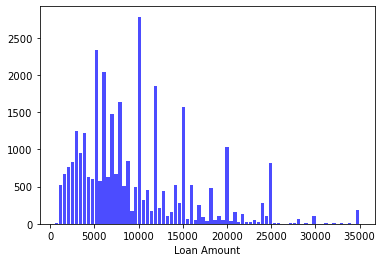

In [3]:
# Look at the distribution of loan amounts with a histogram
n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.7, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.show()

In [4]:
cr_loan.shape

(32581, 12)

There are 32 000 rows of data so the scatter plot may take a little while to plot.


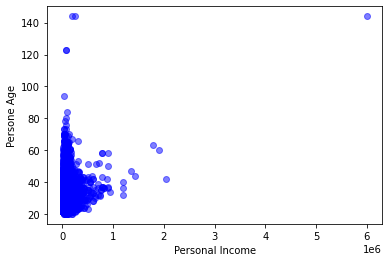

In [5]:
print("There are 32 000 rows of data so the scatter plot may take a little while to plot.")

# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

# Crosstab and pivot tables
Often, financial data is viewed as a pivot table in spreadsheets like Excel.

With cross tables, you get a high level view of selected columns and even aggregation like a count or average. For most credit risk models, especially for probability of default, columns like person_emp_length and person_home_ownership are common to begin investigating.

You will be able to see how the values are populated throughout the data, and visualize them. For now, you need to check how loan_status is affected by factors like home ownership status, loan grade, and loan percentage of income.

The data set cr_loan has been loaded in the workspace

In [6]:
# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status'], margins = True))

loan_status            0     1    All
loan_intent                          
DEBTCONSOLIDATION   3722  1490   5212
EDUCATION           5342  1111   6453
HOMEIMPROVEMENT     2664   941   3605
MEDICAL             4450  1621   6071
PERSONAL            4423  1098   5521
VENTURE             4872   847   5719
All                25473  7108  32581


In [7]:
# Create a cross table of home ownership, loan status, and grade
print(pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']]))

loan_status               0                                 1             \
loan_grade                A     B     C    D    E   F  G    A     B    C   
person_home_ownership                                                      
MORTGAGE               5219  3729  1934  658  178  36  0  239   324  321   
OTHER                    23    29    11    9    2   0  0    3     5    6   
OWN                     860   770   464  264   26   7  0   66    34   31   
RENT                   3602  4222  2710  554  137  28  1  765  1338  981   

loan_status                               
loan_grade                D    E   F   G  
person_home_ownership                     
MORTGAGE                553  161  61  31  
OTHER                    11    6   2   0  
OWN                      18   31   8   5  
RENT                   1559  423  99  27  


In [8]:
# Create a cross table of home ownership, loan status, and average percent income
print(pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
                  values=cr_loan['loan_percent_income'], aggfunc='mean'))

loan_status                   0         1
person_home_ownership                    
MORTGAGE               0.146504  0.184882
OTHER                  0.143784  0.300000
OWN                    0.180013  0.297358
RENT                   0.144611  0.264859


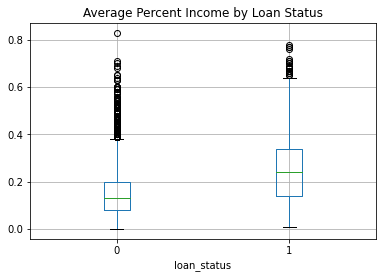

In [9]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()

# Outliers in credit data
Now you need to find and remove outliers you suspect might be in the data. For this exercise, you can use cross tables and aggregate functions.

Have a look at the person_emp_length column. You've used the aggfunc = 'mean' argument to see the average of a numeric column before, but to detect outliers you can use other functions like min and max.

It may not be possible for a person to have an employment length of less than 0 or greater than 60. You can use cross tables to check the data and see if there are any instances of this!

The data set cr_loan has been loaded in the workspace.

In [10]:
# Create the cross table for loan status, home ownership, and the max employment length
print(pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
                  values=cr_loan['person_emp_length'], aggfunc='max'))

# Create an array of indices where employment length is greater than 60
indices = cr_loan[cr_loan['person_emp_length'] > 60].index

# Drop the records from the data based on the indices and create a new dataframe
cr_loan_new = cr_loan.drop(cr_loan.index[indices])

person_home_ownership  MORTGAGE  OTHER   OWN   RENT
loan_status                                        
0                         123.0   24.0  31.0   41.0
1                          34.0   11.0  17.0  123.0


In [11]:
print(pd.crosstab(cr_loan_new['loan_status'],cr_loan_new['person_home_ownership'],
                  values=cr_loan_new['person_emp_length'], aggfunc=['min','max']))

                           min                      max                  
person_home_ownership MORTGAGE OTHER  OWN RENT MORTGAGE OTHER   OWN  RENT
loan_status                                                              
0                          0.0   0.0  0.0  0.0     38.0  24.0  31.0  41.0
1                          0.0   0.0  0.0  0.0     34.0  11.0  17.0  27.0


Off to a great start! Generally with credit data, key columns like person_emp_length are of high quality, but there is always room for error. With this in mind, we build our intuition for detecting outliers!
# Visualizing credit outliers

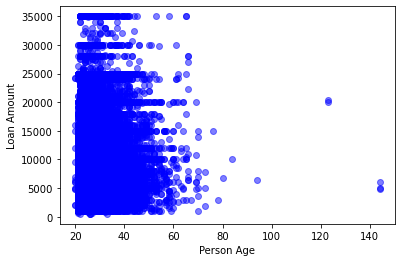

In [12]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

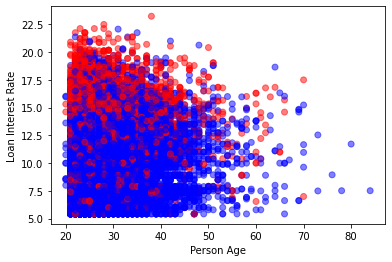

In [13]:
import matplotlib
# Use Pandas to drop the record from the data frame and create a new one
cr_loan_new = cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index)

# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan_new['person_age'], cr_loan_new['loan_int_rate'],
            c = cr_loan_new['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()

You really .drop() those rows like they're hot! Notice that in the last plot we have loan_status as a label for colors. This shows a different color depending on the class. In this case, it's loan default and non-default, and it looks like there are more defaults with high interest rates.
# Risk with missing data in loan data
1. Risk with missing data in loan data
With the outliers now removed from our data set, we can now focus on another problem with credit data and that is when data is missing.

2. What is missing data?
Normally, you might think of missing data as when an entire row is missing, but that is not the only way data can be missing. Data can be missing when there are null values in place of actual values. It can also be an empty string instead of a real string. For this course, we will refer to missing data as when specific values are not present, not when entire rows of data are missing. Any of the columns within our data can contain missing values. If we see a row of data with missing values in a Pandas dataframe, it will look something like this. Notice for employment length we see NAN, or not a number, instead of a value.

3. Similarities with outliers
One issue with missing data is similar to problems caused with outliers in that it negatively impacts predictive model performance. It can bias our model in unanticipated ways, which can affect how we predict defaults. This could result in us predicting a large number of defaults that are not actually defaults because the model is biased towards defaults. Also, many machine learning models in Python do not automatically ignore missing values, and will often throw errors and cease training.

4. Similarities with outliers
Here are some examples of missing data and possible results. If there are null values in numeric or string columns, the model will throw an error.

5. How to handle missing data
So, how do we handle missing data? Most often, it is handled in one of three ways. Sometimes we need to replace missing values. This could be replacing a null with the average value of that column. Other times we remove the row with missing data all together. For example, if there are nulls in loan amount, we should drop those rows entirely. We sometimes keep missing values as well. This, however, is not the case with most loan data. Understanding the data will direct you towards one of these three actions.

6. How to handle missing data
For example, if the loan status is null, it's possible that the loan was recently processed in our system. Sometimes there is a data delay, and additional time needed for processing. In this case, we should just remove the whole row. Another example is where the person's age is missing. Here, we might be able to replace the missing age values with the median of everyone's age.

7. Finding missing data
But how do we find missing data? With Pandas, we can find missing data like nulls using the isnull function and the sum function to count the rows with data missing. By combining the functions isnull, sum, and any, we count all the null values in each column. This produces a table of values show the count of records with nulls in the data.

8. Replacing Missing data
If we decide to replace missing data, we can call the fill-n-a method from Pandas along with aggregate functions. This will replace only missing values. In this example, we replace null interest rates with the average of all interest rates in the data. The result, as shown here, replaces a null interest rate with 11 percent.

9. Dropping missing data
Dropping rows with missing data is just like dropping rows with outliers like in the previous video. We use the drop method from Pandas. Here, we find the rows with missing data using isnull, and then drop the rows from the data set entirely.

10. Let's practice!
So, we've learned what missing data is, how to handle it, and some examples of how we will process it. Let's jump into some programming exercises and explore!
## Replacing missing credit data
Now, you should check for missing data. If you find missing data within loan_status, you would not be able to use the data for predicting probability of default because you wouldn't know if the loan was a default or not. Missing data within person_emp_length would not be as damaging, but would still cause training errors.

So, check for missing data in the person_emp_length column and replace any missing values with the median.

The data set cr_loan has been loaded in the workspace.

Index(['person_emp_length', 'loan_int_rate'], dtype='object')
     person_age  person_income person_home_ownership  person_emp_length  \
105          22          12600              MORTGAGE                NaN   
222          24         185000              MORTGAGE                NaN   
379          24          16800              MORTGAGE                NaN   
407          25          52000                  RENT                NaN   
408          22          17352              MORTGAGE                NaN   

           loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
105           PERSONAL          A       2000           5.42            1   
222          EDUCATION          B      35000          12.42            0   
379  DEBTCONSOLIDATION          A       3900            NaN            1   
407           PERSONAL          B      24000          10.74            1   
408          EDUCATION          C       2250          15.27            0   

     loan_percent_income cb_pe

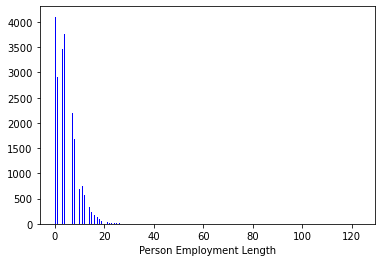

In [14]:
# Print a null value column array
print(cr_loan.columns[cr_loan.isnull().any()])

# Print the top five rows with nulls for employment length
print(cr_loan[cr_loan['person_emp_length'].isnull()].head())

# Impute the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

# Removing missing data
You replaced missing data in person_emp_length, but in the previous exercise you saw that loan_int_rate has missing data as well.

Similar to having missing data within loan_status, having missing data within loan_int_rate will make predictions difficult.

Because interest rates are set by your company, having missing data in this column is very strange. It's possible that data ingestion issues created errors, but you cannot know for sure. For now, it's best to .drop() these records before moving forward.

The data set cr_loan has been loaded in the workspace.

In [15]:
# Print the number of nulls
print(cr_loan['loan_int_rate'].isnull().sum())

# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

# Save the new data without missing data
cr_loan_clean = cr_loan.drop(indices)

3116


Nice! Now that the missing data and outliers have been processed, the data is ready for modeling! More often than not, financial data is fairly tidy, but it's always good to practice preparing data for analytical work.
# Missing data intuition
Here's an intuition check! When handling missing data, you have three options: keep, replace, and remove.

You've been looking at numeric columns, but what about a non-numeric column? How would you handle missing data in the column person_home_ownership which has string values?

The object ownership_table has already been created to show how many records occur in each unique value of person_home_ownership with the following code:

# Count the number of records for each unique value
cr_loan['person_home_ownership'].value_counts()
ownership_table and cr_loan are already loaded in the workspace.

In [16]:
# Count the number of records for each unique value
cr_loan['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

You're right! We already have an all-inclusive class within person_home_ownership that stores all other types of home ownership as Other. With this, we eliminate missing data without affecting the data as a whole.

# Logistic regression for probability of default
. Logistic regression for probability of default
Now that we've removed both outliers and missing data from out data set, we can begin modeling to predict the probability of default.

2. Probability of default

Recall that the probability of default is the likelihood that someone will fail to repay a loan. This is expressed as a probability which is a value between zero and one. These probabilities are associated with our loan status column where a 1 is a default, and a 0 is a non default.

3. Probability of default

The resulting predictions give us probabilities of default. The closer the value is to 1, the higher the probability of the loan being a default.

4. Predicting probabilities

To get these probabilities, we train machine learning models on our credit data columns, known as features, so the models learn how to use the data to predict the probabilities. These types of models are known as classification models, where the class is default or non-default. In the industry, two models are used frequently. These are logistic regressions, and decision trees. Both of these models can predict the probability of default, and tell us how important each column is for predictions.

5. Logistic regression

The logistic regression is like a linear regression but only produces a value between 0 and 1. Notice that the equation for the linear regression is actually part of the logistic regression. Logistic regressions perform better on data when what determines a default or non-default can vary greatly. Think about the y-intercept here, which is the log odds of non-default. This as another way of expressing the overall probability of non-default.

6. Training a logistic regression

In this course, we use the logistic regression within scikit learn. The use of the model is easy. Like any function, you can pass in parameters or not. The solver parameter is an optimizer, just like the solver in Excel. LBFGS is the default. To train the model, we call the fit method on it. Within the method, we have to provide the model with training columns and training labels. We use ravel from numpy to make the labels a one-dimensional array instead of a data frame. In our credit data, the training columns are every column except the loan status. The loan status contains the labels.

7. Training and testing

Generally, in machine learning, we split our entire data set into two individual data sets.

8. Training and testing

They are the training set and the test set. We use the majority of the data to train our models, so they learn as much as possible from the data. Our test set is used to see how our model reacts to new data that it has not seen before. This is like students learning in school. They will learn facts from one subject, and be tested on different facts from that same subject. This way, we can asses their mastery of the topic.


9. Creating the training and test sets

The first thing we do is separate our data into training columns and labels. Here, we have assigned those as X and Y. With that done, we use the test train split function within the sci-kit learn package. Let's have a look at the code. Remember how I said we need training columns and labels for our model? We need these for both the training set and the test set, which are all easily created with one line of code. Within this function, we set the percentage of the data to be used as a test set, and a number used as a random seed for reproducibility.


10. Let's practice!

Now that we've learned how to use a logistic regression to predict the probability of default, let's jump right into some programming exercises!

In [17]:

cr_loan_clean= pd.read_csv('C:/Users/rzouga/Desktop/ALLINHERE/ALLINHERE/Credit_Risk/Credit_Risk_Analysis_Data/cr_loan_nout_nmiss.csv')


In [18]:
from sklearn.linear_model import LogisticRegression
# Create the X and y data sets
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Create and fit a logistic regression model
clf_logistic_single = LogisticRegression()
clf_logistic_single.fit(X, np.ravel(y ))

# Print the parameters of the model
print(clf_logistic_single.get_params())

# Print the intercept of the model
print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.45785901]


# Multivariate logistic regression
Generally, you won't use only loan_int_rate to predict the probability of default. You will want to use all the data you have to make predictions.

With this in mind, try training a new model with different columns, called features, from the cr_loan_clean data. Will this model differ from the first one? For this, you can easily check the .intercept_ of the logistic regression. Remember that this is the y-intercept of the function and the overall log-odds of non-default.

The cr_loan_clean data has been loaded in the workspace along with the previous model clf_logistic_single.

In [19]:
# Create X data for the model
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Create a set of y data for training
y = cr_loan_clean[['loan_status']]

# Create and train a new logistic regression
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Print the intercept of the model
print(clf_logistic_multi.intercept_)

[-4.21645549]


# Creating training and test sets
You've just trained LogisticRegression() models on different columns.

You know that the data should be separated into training and test sets. test_train_split() is used to create both at the same time. The training set is used to make predictions, while the test set is used for evaluation. Without evaluating the model, you have no way to tell how well it will perform on new loan data.

In addition to the intercept_, which is an attribute of the model, LogisticRegression() models also have the .coef_ attribute. This shows how important each training column is for predicting the probability of default.

The data set cr_loan_clean is already loaded in the workspace.

In [20]:
cr_loan_clean.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [21]:
# Create the X and y data sets
X =cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]

y = cr_loan_clean[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.4, random_state=123)

# Create and fit the logistic regression model
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Print the models coefficients
print(clf_logistic.coef_)

[[ 1.28517496e-09 -2.27622202e-09 -2.17211991e-05]]


# Predicting the probability of default

1. Predicting the probability of default

So far, we've trained a logistic regression on our credit data, and looked some attributes of the model. Now, let's discuss the structure of the model and how to create predictions.

2. Logistic regression coefficients

In the previous exercise, we saw the following intercept and coefficients for our model. These coefficients the importance of each column. These values are part of the logistic regression formula that calculates the probability of default which we see here. Each coefficient is multiplied by the values in the column, and then added together along with the intercept. Then, 1 is divided by the sum of 1 and e to the negative power of our intercept coefficient sums. The result is the probability of default.

3. Interpreting coefficients

Consider employment length as an example. I've already calculated the intercept and coefficient for a logistic regression using this one column. What this coefficient tells us is the log odds for non-default. This means that for every 1 year increase in employment length, the person is less likely to default by a factor of the coefficient.

4. Interpreting coefficients

Let's say we have 3 values for employment length, and we want to know how this affects our probability of default by looking at the coefficients. What we see here is that the higher a person's employment length is, the less likely they are to default.

5. Using non-numeric columns

Since we're talking about numbers, it's worth mentioning that so far we have only used numeric columns to train out models. Our data also contains non-numeric columns like loan intent, which uses words to describe how the person plans to use the money we lend them. In Python, unlike R, machine learning models do not know how to use these non-numeric values. So, we have to perform an operation called one-hot encoding before we can use them.

6. One-hot encoding

One-hot encoding sounds complicated, but it's really simple. The main idea is to represent a string with a numeric value. Here is how it works. Let's think about the loan intent column where each loan has it's own intent value as a string. This sample has education, medical, and venture.

7. One-hot encoding

With one-hot encoding, we get a new set of columns where each value from loan intent is now it's own column. Each new column is created by separating out the loans with each intent value and making the new column's value a 0 or 1. For example, if the loan intent was education, it is now represented with a 1 in the loan intent education column. This way, there is one hot value.

8. Get dummies

To one-hot encode our string columns, we use the get dummies function within pandas. First, we separate the numeric and non-numeric columns from the data into two sets. Then we use the get dummies function to one-hot encode only the non-numeric columns. We union the two sets and the result is a full data set that's ready for machine learning!

9. Predicting the future, probably

Once our model is trained, we use the predict proba method on test data to make predictions. This creates a set of probabilities for non-default and default. Notice the output is a series of numbers between 0 and 1. We have two for each loan. The first number is the probability of non-default, and the second number is the probability of default.

10. Let's practice!

We've discussed the model coefficients and one-hot encoding, so let's predict loan defaults with code!

In [22]:
# Print the first five rows of each training set
print(X1_train.head())
print(X2_train.head())

# Create and train a model on the first training data
clf_logistic1 = LogisticRegression(solver='lbfgs').fit(X1_train, np.ravel(y_train))

# Create and train a model on the second training data
clf_logistic2 = LogisticRegression(solver='lbfgs').fit(X2_train, np.ravel(y_train))

# Print the coefficients of each model
print(clf_logistic1.coef_)
print(clf_logistic2.coef_)

NameError: name 'X1_train' is not defined

Interesting! Notice that the coefficient for the person_income changed when we changed the data from X1 to X2. This is a reason to keep most of the data like we did in chapter 1, because the models will learn differently depending on what data they're given!

    <script.py> output:
           person_income  person_emp_length  loan_amnt
    22105          72000                  3       9000
    2296           21000                  2       3000
    14465           4800                  0       1200
    6311           92000                  0       6000
    12541          96000                  1       7000
           person_income  loan_percent_income  cb_person_cred_hist_length
    22105          72000                 0.13                           6
    2296           21000                 0.14                           2
    14465           4800                 0.25                           2
    6311           92000                 0.07                           3
    12541          96000                 0.07                           4
    [[-4.02643517e-05 -3.06659219e-08  1.06277246e-04]]
    [[-2.17213449e-05  5.29012401e-10 -2.80735543e-09]]

# One-hot encoding credit data
It's time to prepare the non-numeric columns so they can be added to your LogisticRegression() model.

Once the new columns have been created using one-hot encoding, you can concatenate them with the numeric columns to create a new data frame which will be used throughout the rest of the course for predicting probability of default.

Remember to only one-hot encode the non-numeric columns. Doing this to the numeric columns would create an incredibly wide data set!

The credit loan data, cr_loan_clean, has already been loaded in the workspace.

In [23]:
# Create two data sets for numeric and non-numeric data
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [25]:
avg_loan_amnt=cr_loan_prep.loan_amnt.mean()

# Predicting probability of default
All of the data processing is complete and it's time to begin creating predictions for probability of default. You want to train a LogisticRegression() model on the data, and examine how it predicts the probability of default.

So that you can better grasp what the model produces with predict_proba, you should look at an example record alongside the predicted probability of default. How do the first five predictions look against the actual values of loan_status?

The data set cr_loan_prep along with X_train, X_test, y_train, and y_test have already been loaded in the workspace.

In [26]:
# Create the X and y data sets
X =cr_loan_prep.drop('loan_status', axis=1)

y = cr_loan_prep[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1, random_state=123)

In [77]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
preds_df_lr = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df_lr = pd.DataFrame(preds_df_lr[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head(5)

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df_lr], axis = 1))

   loan_status  prob_default
0            1      0.445033
1            1      0.222860
2            0      0.287792
3            0      0.168842
4            1      0.113909


Neat! We have some predictions now, but they don't look very accurate do they? It looks like most of the rows with loan_status at 1 have a low probability of default. How good are the rest of the predictions? Next, let's see if we can determine how accurate the entire model is.
# Credit model performance
1. Credit model performance

We saw predictions for probability of default against true values for loan status, but how do we analyze the performance of our model?

2. Model accuracy scoring

The easiest way to analyze performance is with accuracy. Accuracy is the number of correct predictions divided by the total number of predictions. One way to check this is to use the score method within scikit-learn on the logistic regression. This is used on the trained model and returns the average accuracy for the test set. Using the score method will display this accuracy as a percentage. In this example, it tells us that 81 percent of the loans were predicted correctly.

3. ROC curve charts

R-O-C charts are a great way to visualize the performance of our model. They plot the true positive rate, the percentage of correctly predicted defaults, against the false positive rate, the percentage of incorrectly predicted defaults. Using the roc_curve function in scikit-learn, we create these two values and the thresholds all at once. From there, we use a normal line plot to see the results. The dotted blue line represents a random prediction and the orange line represents our model's predictions.

4. Analyzing ROC charts

R-O-C charts are interpreted by looking at how far away the model's curve gets from the dotted blue line shown here, which represents the random prediction. This movement away from the line is called lift. The more lift we have, the larger the area under the curve gets. The A-U-C is the calculated area between the curve and the random prediction. This is a direct indicator of how well our model makes predictions.

5. Default thresholds

To analyze performance further, we need to decide what probability range is a default, and what is a non-default. Let's say that we decide any probability over 0.5 is a default, and anything below that is a non-default. What this means is that we will assign a new loan_status to these loans based on their probability of default and the threshold. Once we have this, we can further check the model's performance.

6. Setting the threshold

Once the threshold is defined, we need to relabel our loans based on that threshold. For that, we will first need to create a variable to store the predicted probabilities. Then we can create a data frame from the second column which contains the probabilities of default. Then we apply a quick function to assign a value of 1 if the probability of default is above our threshold of 0.5. The lambda is there just to tell Python that we want to use a one-time function without defining it. The result of this is a data frame with new values for loan status based on our threshold.

7. Credit classification reports

Another really useful function for evaluating our models is the classification report function within scikit-learn. This will show us several different evaluation metrics all at once! We use this function to evaluate our model using our true values for loan status stored in the y_test set, and our predicted loan status values from our logistic regression and the threshold we set. There are 2 really useful metrics in this table, and they are the precision and recall. For now, let's focus on recall.

8. Selecting classification metrics

Sometimes after generating the report, you want to select or store specific values from within the report. To do this, you can use the precision recall fscore support function within sci-kit learn. With this function, we can get the recall for defaults from by subsetting the report the way we would any array. Here we select the second value from the second set.

9. Let's practice!

Now that we've talked about model accuracy, recall, and AUC scores let's put it all into practice with code!

In [28]:
from sklearn.metrics import classification_report,precision_recall_fscore_support,roc_curve,roc_auc_score,confusion_matrix
# Create a dataframe for the probabilities of default
preds_df = pd.DataFrame(preds[:,1], columns = ['prob_default'])

# Reassign loan status based on the threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.50 else 0)

# Print the row counts for each loan status
print(preds_df['loan_status'].value_counts())

# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

0    2799
1     147
Name: loan_status, dtype: int64
              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      2309
     Default       0.71      0.16      0.27       637

    accuracy                           0.81      2946
   macro avg       0.76      0.57      0.58      2946
weighted avg       0.79      0.81      0.75      2946



Well isn't this a surprise! It looks like almost all of our test set was predicted to be non-default. The recall for defaults is 0.16 meaning 16% of our true defaults were predicted correctly.

In [29]:
# Print all the non-average values from the report
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.80993212, 0.71428571]), array([0.98181031, 0.16483516]), array([0.88762725, 0.26785714]), array([2309,  637], dtype=int64))


# Visually scoring credit models
Now, you want to visualize the performance of the model. In ROC charts, the X and Y axes are two metrics you've already looked at: the false positive rate (fall-out), and the true positive rate (sensitivity).

You can create a ROC chart of it's performance with the following code:

fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity)
To calculate the AUC score, you use roc_auc_score().

The credit data cr_loan_prep along with the data sets X_test and y_test have all been loaded into the workspace. A trained LogisticRegression() model named clf_logistic has also been loaded into the workspace.

0.8039987779625921


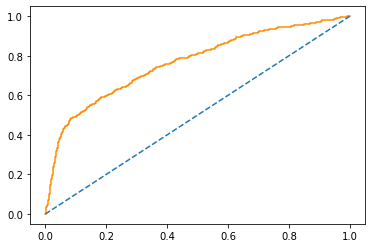

In [30]:
# Create predictions and store them in a variable
preds = clf_logistic.predict_proba(X_test)

# Print the accuracy score the model
print(clf_logistic.score(X, y))

# Plot the ROC curve of the probabilities of default
prob_default = preds[:, 1]
fallout, sensitivity, thresholds = roc_curve(y_test, prob_default)
plt.plot(fallout, sensitivity, color = 'darkorange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

# Compute the AUC and store it in a variable
auc = roc_auc_score(y_test, prob_default)

I  wasn't worried about your .score() on this exercise! So the accuracy for this model is about 80% and the AUC score is 76%. Notice that what the ROC chart shows us is the tradeoff between all values of our false positive rate (fallout) and true positive rate (sensitivity).
# Model discrimination and impact
Thresholds and confusion matrices
You've looked at setting thresholds for defaults, but how does this impact overall performance? To do this, you can start by looking at the effects with confusion matrices.

Recall the confusion matrix as shown here:



Set different values for the threshold on probability of default, and use a confusion matrix to see how the changing values affect the model's performance.

The data frame of predictions, preds_df, as well as the model clf_logistic have been loaded in the workspace.

In [31]:
# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[2267   42]
 [ 532  105]]


In [32]:
# Set the threshold for defaults to 0.4
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Print the confusion matrix
print(confusion_matrix(y_test,preds_df['loan_status']))

[[2117  192]
 [ 331  306]]


# How thresholds affect performance
Setting the threshold to 0.4 shows promising results for model evaluation. Now you can assess the financial impact using the default recall which is selected from the classification reporting using the function precision_recall_fscore_support().

For this, you will estimate the amount of unexpected loss using the default recall to find what proportion of defaults you did not catch with the new threshold. This will be a dollar amount which tells you how much in losses you would have if all the unfound defaults were to default all at once.

The average loan value, avg_loan_amnt has been calculated and made available in the workspace along with preds_df and y_test.

In [33]:
# Reassign the values of loan status based on the new threshold
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)

# Store the number of loan defaults from the prediction data
num_defaults = preds_df['loan_status'].value_counts()[1]

# Store the default recall from the classification report
default_recall = precision_recall_fscore_support(y_test,preds_df['loan_status'])[1][1]

# Calculate the estimated impact of the new default recall rate
print(num_defaults * avg_loan_amnt * (1 - default_recall))

2479971.1322385473


# Threshold selection
You know there is a trade off between metrics like default recall, non-default recall, and model accuracy. One easy way to approximate a good starting threshold value is to look at a plot of all three using matplotlib. With this graph, you can see how each of these metrics look as you change the threshold values and find the point at which the performance of all three is good enough to use for the credit data.

The threshold values thresh, default recall values def_recalls, the non-default recall values nondef_recalls and the accuracy scores accs have been loaded into the workspace. To make the plot easier to read, the array ticks for x-axis tick marks has been loaded as well.

In [34]:
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs)
plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

NameError: name 'thresh' is not defined

# Gradient boosted trees with XGBoost
Trees for defaults
You will now train a gradient boosted tree model on the credit data, and see a sample of some of the predictions. Do you remember when you first looked at the predictions of the logistic regression model? They didn't look good. Do you think this model be different?

The credit data cr_loan_prep, the training sets X_train and y_train, and the test data X_test is available in the workspace. The XGBoost package is loaded as xgb.


In [35]:
# Train a model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

# Predict with a model
gbt_preds = clf_gbt.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(gbt_preds[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))

   loan_status  prob_default
0            1      0.963135
1            1      0.874842
2            0      0.013830
3            0      0.025493
4            1      0.076483


Interesting! The predictions don't look the same as with the LogisticRegression(), do they? Notice that this model is already accurately predicting the probability of default for some loans with a true value of 1 in loan_status.

# Gradient boosted portfolio performance
At this point you've looked at predicting probability of default using both a LogisticRegression() and XGBClassifier(). You've looked at some scoring and have seen samples of the predictions, but what is the overall affect on portfolio performance? Try using expected loss as a scenario to express the importance of testing different models.

A data frame called portfolio has been created to combine the probabilities of default for both models, the loss given default (assume 20% for now), and the loan_amnt which will be assumed to be the exposure at default.



The data frame cr_loan_prep along with the X_train and y_train training sets have been loaded into the workspace.

In [36]:
# Print the first five rows of the portfolio data frame
print(portfolio.head())

# Create expected loss columns for each model using the formula
portfolio['gbt_expected_loss'] = portfolio['gbt_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']
portfolio['lr_expected_loss'] = portfolio['lr_prob_default'] * portfolio['lgd'] * portfolio['loan_amnt']

# Print the sum of the expected loss for lr
print('LR expected loss: ', np.sum(portfolio['lr_expected_loss']))

# Print the sum of the expected loss for gbt
print('GBT expected loss: ', np.sum(portfolio['gbt_expected_loss']))

NameError: name 'portfolio' is not defined

In [37]:
# Predict the labels for loan status
gbt_preds = clf_gbt.predict(X_test)

# Check the values created by the predict method
print(gbt_preds)

# Print the classification report of the model
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_preds, target_names=target_names))

[1 1 0 ... 1 0 0]
              precision    recall  f1-score   support

 Non-Default       0.91      0.99      0.95      2309
     Default       0.93      0.66      0.78       637

    accuracy                           0.92      2946
   macro avg       0.92      0.83      0.86      2946
weighted avg       0.92      0.92      0.91      2946



Wow. Have a look at the precision and recall scores! Remember the low default recall values we were getting from the LogisticRegression()? This model already appears to have serious potential.
# Column selection for credit risk
1. Column selection for credit risk

We've trained logistic regression models and gradient boosted trees now. But does selecting specific columns affect model performance?

2. Choosing specific columns

When we first started working with logistic regression models, we used only a few columns. Now, we've been using all of the columns, but how do we know which are the most important for accurately predicting probability of default? For logistic regression models, we were looking at the coefficient of each column and interpreting that coefficient as a weight or measure of importance. But what do we use for our gradient boosted trees?

3. Column importances

The first easy way to tell which columns are important is to check the feature importances using the get booster and get score methods together. For this course we will focus on the weight type, which shows how many times the column appears in all the models' trees. Once we've trained a model, we are able to see the feature importances by calling these two methods in sequence This returns is a dictionary of each column's name with the weight number as shown here.

4. Column importance interpretation

These were the importance values we looked at in the last example, but how do we interpret this? In this example, our model created two trees which were gradient boosted. Our column importance for person home ownership was 2, and we can see here that the column appears in both trees. The person home ownership rent is only in one of the trees, so it's column importance is one.

5. Plotting column importances

We can also visualize the column importances with the plot importance function in xgboost. We call this function and pass in our model to see a nice visualization of the importances. In this example, our model created 400 trees, and the person_income column was used 315 times across all of them. So, 315 of the 400 trees used person_income.

6. Choosing training columns

Once we have the importances for each column, to determine if we want to create a new training set with only select columns. Different combinations of these columns will affect the overall performance Consider this example. We have two training sets. One has loan interest rate and employment length, while the other has these two columns and the loan's percentage of the person's income. In this example, adding another column improves the accuracy, but changes the importance of the other two columns and reduces default recall. Sometimes adding more columns increases accuracy, but it can also make it more difficult for the model to learn and decrease other performance metrics like default recall.

7. F1 scoring for models

It can be difficult to use two metrics like accuracy and recall to gauge a model's performance. Fortunately, there is already a defined metric that combines both of these two into one. This metric is the F1 score. This is a combination of both precision and recall. This is useful because it helps us keep recall for loan defaults as an important consideration for any model. The formula, as shown here, is two times the product of the precision and recall divided by their sum. The great thing is that this number already shows up in a classification report. Here, we see the F1-score numbers for both defaults and non-defaults.

8. Let's practice!
Now that we've talked about how important different columns are for predictions as well as how to select different columns and why, let's dive into the code again to put these ideas into practice!

# Column importance and default prediction
When using multiple training sets with many different groups of columns, it's important to keep and eye on which columns matter and which do not. It can be expensive or time-consuming to maintain a set of columns even though they might not have any impact on loan_status.

The X data for this exercise was created with the following code:
X = cr_loan_prep[['person_income','loan_int_rate',
                  'loan_percent_income','loan_amnt',
                  'person_home_ownership_MORTGAGE','loan_grade_F']]
Train an XGBClassifier() model on this data, and check the column importance to see how each one performs to predict loan_status.

The cr_loan_pret data set along with X_train and y_train have been loaded in the workspace.

In [39]:
X = cr_loan_prep[['person_income','loan_int_rate',
                  'loan_percent_income','loan_amnt',
                  'person_home_ownership_MORTGAGE','loan_grade_F']]
y = cr_loan_prep[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1, random_state=123)
# Create and train the model on the training data
clf_gbt = xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

# Print the column importances from the model
print(clf_gbt.get_booster().get_score(importance_type = 'weight'))

{'loan_percent_income': 93, 'loan_int_rate': 180, 'person_income': 310, 'person_home_ownership_MORTGAGE': 41, 'loan_amnt': 51, 'loan_grade_F': 7}


# Visualizing column importance
When the model is trained on different sets of columns it changes the performance, but does the importance for the same column change depending on which group it's in?

The data sets X2 and X3 have been created with the following code:


    X2 = cr_loan_prep[['loan_int_rate','person_emp_length']]
    X3 = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income']]

Understanding how different columns are used to arrive at a loan_status prediction is very important for model interpretability.

The data sets cr_loan_prep, X2_train, X2_test, X3_train, X3_test, y_train, y_test are loaded in the workspace.

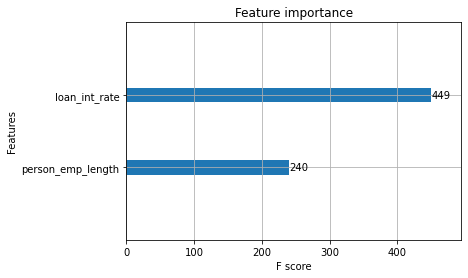

In [40]:
X2 = cr_loan_prep[['loan_int_rate','person_emp_length']]
X3 = cr_loan_prep[['person_income','loan_int_rate','loan_percent_income']]
# Train a model on the X data with 2 columns
clf_gbt2 = xgb.XGBClassifier().fit(X2,np.ravel(y))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt2, importance_type = 'weight')
plt.show()

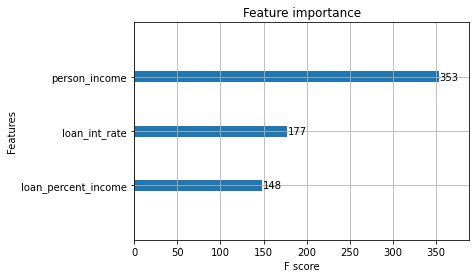

In [41]:
# Train a model on the X data with 3 columns
clf_gbt3 = xgb.XGBClassifier().fit(X3,np.ravel(y))

# Plot the column importance for this model
xgb.plot_importance(clf_gbt3, importance_type = 'weight')
plt.show()

Take a closer look at the plots. Did you notice that the importance of loan_int_rate went from 456 to 195? Initially, this was the most important column, but person_income ended up taking the top spot here.
Column selection and model performance

Creating the training set from different combinations of columns affects the model and the importance values of the columns. Does a different selection of columns also affect the F-1 scores, the combination of the precision and recall, of the model? You can answer this question by training two different models on two different sets of columns, and checking the performance.

Inaccurately predicting defaults as non-default can result in unexpected losses if the probability of default for these loans was very low. You can use the F-1 score for defaults to see how the models will accurately predict the defaults.

The credit data, cr_loan_prep and the two training column sets X and X2 have been loaded in the workspace. The models gbt and gbt2 have already been trained.

In [44]:
# Predict the loan_status using each model
gbt_preds = clf_gbt.predict(X)
gbt2_preds = clf_gbt2.predict(X2)

# Print the classification report of the first model
target_names = ['Non-Default', 'Default']
print(classification_report(y,gbt_preds,  target_names=target_names))

# Print the classification report of the second model
print(classification_report( y,gbt2_preds,  target_names=target_names))



              precision    recall  f1-score   support

 Non-Default       0.90      0.96      0.93     22996
     Default       0.80      0.62      0.70      6463

    accuracy                           0.88     29459
   macro avg       0.85      0.79      0.81     29459
weighted avg       0.88      0.88      0.88     29459

              precision    recall  f1-score   support

 Non-Default       0.83      0.97      0.89     22996
     Default       0.70      0.28      0.40      6463

    accuracy                           0.82     29459
   macro avg       0.76      0.62      0.64     29459
weighted avg       0.80      0.82      0.78     29459



 Originally, it looked like the selection of columns affected model accuracy the most, but now we see that the selection of columns also affects recall by quite a bit.
 # Cross validation for credit models
1. Cross validation for credit models

As we select different hyperparameters and columns for our models, how do we know how they will perform over time? This is where we use cross validation to test our models to see how they might perform after we implement them.

2. Cross validation basics

But what is cross validation? Simply put, it is a method for training and testing a model multiple times on the same data. We cannot create more loan data to help us develop our model, but we can use cross validation to simulate how our model will perform on new loan data before it comes in. Within XGBoost, to use cross validation you need to create a specialized object called dmatrix, which is just a different way of storing the training data. We also need to use early stopping to keep the models robust. This tells cross validation to stop when the score of the model has not improved after a set number of iterations.

3. How cross validation works

Here's how cross validation works. What we do is take the entire set of training data and create pieces, called folds, from it. All but one of the folds are used for training, and the remaining fold is used as a kind of miniature test set. Once testing on all folds is completed, the model is tested against the actual test set. We've created 5 folds. Now what happens is the model is trained on 4 of the folds, and tested against the final fold. This process repeats through 5 splits so that each fold is used for testing at least once. Once this is done, the parameters are averaged across each training session and then the model is finally tested against the original test set.

1 https://scikit
2 learn.org/stable/modules/cross_validation.html
4. Setting up cross validation within XGBoost
Here is how we use cross validation from within xgboost. First, we set the number of folds. Then, we set the number of iterations we will allow before the simulations stop. Next, we create a dictionary of parameters. The binary logistic parameter we created tells xgboost that we want to predict a 0 or 1 for loan status. The performance metric here is the area under the curve. This is the same metric we used on the logistic regression models.

5. Using cross validation within XGBoost

After creating the dictionary of parameters, we transform our training data into the specialized dmatrix object for xgboost. Last, we call the cv function and pass in the data long with all the parameters dictionary.

6. The results of cross validation

What the cv function produces is a data frame of training and test AUC scores for our model. Think of this as a scenario analysis where we want to see how our model would perform as new loans come in. Here we see that the auc for the test and train set improves as the model trains on each fold. This suggests that the performance will be stable.

7. Cross validation scoring

Within scikit-learn there is another helpful function that combines cross validation, and the accuracy scoring metrics we've seen so far. This is the cross val score function. This is used to automatically perform cross validation with data splitting, model training, and scoring all at once! This function comes from the model selection module and is used like this. We first pass in the model, the training data, the training labels, and then the number of folds for cross validation. There are other ways to use this, but when cv is a number, it automatically uses folds. The result is an array of scores for each iteration of training and scoring.

8. Let's practice!

We've learned a lot about model scoring and testing to further validate our models to ensure their performance and success. Let's do some quick programming exercises to reinforce our new knowledge!

# Complete Pipe 

In [46]:

import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
# Import StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.manifold import TSNE
from sklearn.model_selection import GridSearchCV
# Import train_test_split()
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from datetime import datetime, date
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.model_selection import cross_val_score
import lightgbm as lgbm
import  tensorflow as tf 
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
import smogn
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb

In [54]:
# Create the X and y data sets
X =cr_loan_prep.drop('loan_status', axis=1)

y = cr_loan_prep[['loan_status']]

# Use test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.1, random_state=123)

#  First CV 

In [55]:
# Set the values for number of folds and stopping iterations
n_folds = 5
early_stopping = 10
params= {'objective': 'binary:logistic', 'seed': 123, 'eval_metric': 'auc'}
# Create the DTrain matrix for XGBoost
DTrain = xgb.DMatrix(X_train, label = y_train)
# Create the data frame of cross validations
cv_df = xgb.cv(params, DTrain, num_boost_round = 5, nfold=n_folds,
            early_stopping_rounds=early_stopping)

# Print the cross validations data frame
print(cv_df)

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.900480       0.002528       0.895664      0.005892
1        0.908401       0.001930       0.902768      0.006431
2        0.913979       0.001307       0.909720      0.006605
3        0.917836       0.002033       0.912970      0.006318
4        0.922420       0.001802       0.917072      0.005320


# Limits to cross-validation testing
You can specify very large numbers for both nfold and num_boost_round if you want to perform an extreme amount of cross-validation. The data frame cv_results_big has already been loaded in the workspace and was created with the following code:

    cv = xgb.cv(params, DTrain, num_boost_round = 600, nfold=10,
                shuffle = True)
Here, cv() performed 600 iterations of cross-validation! The parameter shuffle tells the function to shuffle the records each time.

Have a look at this data to see what the AUC are, and check to see if they reach 1.0 using cross validation. You should also plot the test AUC score to see the progression.

The data frame cv_results_big has been loaded into the workspace.

   train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.900480       0.002528       0.895664      0.005892
1        0.908401       0.001930       0.902768      0.006431
2        0.913979       0.001307       0.909720      0.006605
3        0.917836       0.002033       0.912970      0.006318
4        0.922420       0.001802       0.917072      0.005320
0.9417501465116281


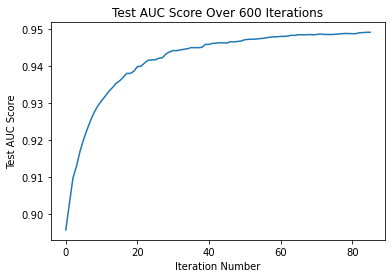

In [62]:
# Create the data frame of cross validations
cv_results_big = xgb.cv(params, DTrain, num_boost_round = 600, nfold=n_folds,
            early_stopping_rounds=early_stopping)
# Print the first five rows of the CV results data frame
print(cv_results_big.head())

# Calculate the mean of the test AUC scores
print(np.mean(cv_results_big['test-auc-mean']))

# Plot the test AUC scores for each iteration
plt.plot(cv_results_big['test-auc-mean'])
plt.title('Test AUC Score Over 600 Iterations')
plt.xlabel('Iteration Number')
plt.ylabel('Test AUC Score')
plt.show()

Notice that the test AUC score never quite reaches 1.0 and begins to decrease slightly after 100 iterations. This is because this much cross-validation can actually cause the model to become overfit. So, there is a limit to how much cross-validation you should to.

# Cross-validation scoring
Now, you should use cross-validation scoring with cross_val_score() to check the overall performance.

This is exercise presents an excellent opportunity to test out the use of the hyperparameters learning_rate and max_depth. Remember, hyperparameters are like settings which can help create optimum performance.

The data sets cr_loan_prep, X_train, and y_train have already been loaded in the workspace.

In [65]:
# Create a gradient boosted tree model using two hyperparameters
gbt = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)

# Calculate the cross validation scores for 4 folds
cv_scores = cross_val_score(gbt, X_train, np.ravel(y_train), cv = 5)

# Print the cross validation scores
print(cv_scores)

# Print the average accuracy and standard deviation of the scores
print("Average accuracy: %0.2f (+/- %0.2f)" % (cv_scores.mean(),
                                              cv_scores.std() * 2))

[0.94003394 0.93682821 0.93777107 0.93285553 0.93078084]
Average accuracy: 0.94 (+/- 0.01)


Your average cv_score for this course is getting higher! With only a couple of hyperparameters and cross-validation, we can get the average accuracy up to 93%. This is a great way to validate how robust the model is.

In [63]:
cross_validation_design = KFold(n_splits=5,
                                shuffle=True,
                                random_state=77)

# params = {'n_neighbors':[2,3,4,5,6,7,8,9]}

XGBT_MODEL = {}
XGBST = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 7)
# Définir la pipeline
XGBT_MODEL['pipeline'] = Pipeline([
                                  #('data_process', data_preprocess),
                                  ('XGBT', XGBST)
                                  ])

# Définir la grille
XGBT_MODEL['hyperparams'] = {}
#XGBT_MODEL['hyperparams']['knn__n_neighbors'] = [1, 3,5,8, 9,10,11,15, 20,21, 51]
#XGBT_MODEL['hyperparams']['knn__weights'] = ['uniform','distance']
#XGBT_MODEL['hyperparams']['knn__metric'] = ['euclidean', 'manhattan', 'minkowski']

# Effectuer la GridSearch
XGBT_MODEL['gridsearch'] = GridSearchCV(
    estimator=XGBT_MODEL['pipeline'],
    param_grid=XGBT_MODEL['hyperparams'],
    cv=cross_validation_design,
    scoring='roc_auc'
    )
XGBT_MODEL['gridsearch'].fit(X_train, y_train)


XGBT_MODEL['gridsearch'].best_params_

XGBT_MODEL['gridsearch'].best_score_

0.9463901305519936

In [58]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

# Class imbalance in loan data
1. Class imbalance in loan data

We just used cross-validation to check the robustness of our model. Let's talk more about how the data impacts the robustness of the model.

2. Not enough defaults in the data

In our credit data, the values for loan status are our classes. By looking at the value counts, we see that the number of defaults and non-defaults is not equal. In the training data, the defaults account for 22%. So, there are far more non-defaults than defaults. This is class imbalance, which is a problem.

3. Model loss function

Our tree models use a loss function called log-loss. Our model will want to predict both classes accurately as this leads to an overall better score. Here, we have one default and one non-default. Each has a predicted probability far away from the actual loan status. With the log-loss function, both result in the same value. So, for our model each is equally bad. The problem is, for loans, a default predicted to be a non-default is much more costly.

4. The cost of imbalance

Let's say we have two loans for a thousand dollars each. One is a non-default predicted as default, and the other is a default predicted as non-default. Here, each has a potential profit of 10 dollars. If we deny a loan because we think it's a default when it isn't, we miss out on 10 dollars. If we accept a loan because we think it's a non-default when it is a default, we could lose a thousand dollars. For the model, each of these is equally bad. For our portfolio, that is definitely not the case.

5. Causes of imbalance

What causes class imbalance can be several different things. One is there might be some issues with the data itself. Maybe the training data was not sampled correctly. For us, the imbalance is perfectly normal. People have incentives to not default on loans. One example is the less often they default, their credit rating goes up and they are able to purchase more things.



6. Dealing with class imbalance

So, how can we deal with class imbalance? One way is to gather more data. However, if it remains normal for people to not default on loans, it's unlikely that the percentage of defaults will change. Another way is to penalize the classification differently. This would have models weight inaccurately predicted defaults more. However, this can require frequent model parameter tuning and maintenance for the life of the model. We will use the simplest method, which is to sample the training data differently.

7. Undersampling strategy

The type of sampling we are going to perform is called undersampling. What we will do is take a random sample of non-defaults and combine it with our defaults. Imagine we have 100 loans where 80% are non-defaults. We will randomly sample only 20 of our non-defaults, and combine that with our set of 20 defaults. With this, we have a balanced training set of 20 defaults and 20 non-defaults.

8. Combining the split data sets

So here is the way we undersample our training data. First we concatenate our X and y training sets because we separated them for our model, but now we need to change the training data as a whole. Then we store the counts for defaults and non-defaults. After that, we create two new data sets. One with only defaults and one with only non-defaults.

9. Undersampling the non-defaults

With that done, we randomly sample our non-defaults to be the same number of loans as our defaults. Then, we concatenate the two data sets together, and we have a balanced training set!

10. Let's practice!

So we've learned why class imbalance is a problem, and an easy way to correct it. Let's get to coding!
# Undersampling training data
It's time to undersample the training set yourself with a few lines of code from Pandas. Once the undersampling is complete, you can check the value counts for loan_status to verify the results.

X_y_train, count_nondefault, and count_default are already loaded in the workspace. They have been created using the following code:

    X_y_train = pd.concat([X_train.reset_index(drop = True),
                           y_train.reset_index(drop = True)], axis = 1)
    count_nondefault, count_default = X_y_train['loan_status'].value_counts()

In [68]:
X_y_train = pd.concat([X_train.reset_index(drop = True),
                           y_train.reset_index(drop = True)], axis = 1)
count_nondefault, count_default = X_y_train['loan_status'].value_counts()
# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default )

# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
                             defaults.reset_index(drop = True)], axis = 0)

# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

1    5826
0    5826
Name: loan_status, dtype: int64


In [83]:
X_under=X_y_train_under.drop('loan_status',axis=1)
y_under=X_y_train_under['loan_status']
# Check the classification reports
target_names = ['Non-Default', 'Default']
clf_gbt_preds  =XGBT_MODEL['gridsearch'].fit(X_train, y_train).predict(X_train)
gbt2_preds =XGBT_MODEL['gridsearch'].fit(X_under, y_under).predict(X_under)
print(classification_report(y_train, clf_gbt_preds, target_names=target_names))
print(classification_report(y_under, gbt2_preds, target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.94      1.00      0.97     20687
     Default       0.99      0.76      0.86      5826

    accuracy                           0.94     26513
   macro avg       0.96      0.88      0.91     26513
weighted avg       0.95      0.94      0.94     26513

              precision    recall  f1-score   support

 Non-Default       0.87      0.98      0.92      5826
     Default       0.98      0.86      0.91      5826

    accuracy                           0.92     11652
   macro avg       0.92      0.92      0.92     11652
weighted avg       0.92      0.92      0.92     11652



In [72]:
# Print the confusion matrix for both old and new models
print(confusion_matrix(y_train,gbt_preds))
print(confusion_matrix(y_under,gbt2_preds))

[[20634    53]
 [ 1420  4406]]
[[5707  119]
 [ 835 4991]]


In [73]:
# Print and compare the AUC scores of the old and new models
print(roc_auc_score(y_train, gbt_preds))
print(roc_auc_score(y_under, gbt2_preds))

0.8768515117123977
0.9181256436663234


Looks like this is classified as a success! Undersampling the training data results in more false positives, but the recall for defaults and the AUC score are both higher than the original model. This means overall it predicts defaults much more accurately.

**"Nicely done! The test set represents the type of data that will be seen by the model in the real world, so changing it would test the model on unrealistic data.**

# Model evaluation and implementation
Got It!
1. Model evaluation and implementation

We've fully developed two models to predict the probability of default, and we need to use many different metrics to compare them to ensure we select the best one.

2. Comparing classification reports

First, we will use classification reports. For comparison, we will look at two side-by-side and focus on one metric, the macro average F-1 score. The calculation behind the F1 score combines precision and recall to create a single metric and is shown here. The unweighted average of the F1 scores for default and non-default is the macro average F1 score. With this, we can use a single number to get a good understanding of each models' performance across defaults and non-defaults.

3. ROC and AUC analysis

We will also use ROC charts and AUC scores. The ROC chart will have a line for each model which allows us to compare the lift for both. The greater the lift means that the AUC score is higher and the model has better performance overall for defaults and non-defaults. In this example, we see two models compared to the random prediction going through the middle. Here, the gradient boosted tree model has more lift, and will have a higher AUC score.

4. Model calibration

Another method we will use to compare models is to check how well calibrated their predicted probabilities are. What this means is we want to be able to interpret these probabilities as a confidence level for default. A model is well-calibrated when a sample of loans has an average predicted probability of default close to that sample's percentage of actual defaults. For example, if we take 10 loans and their average predicted probability of default is 0.12, we expect 12% of the sample to be defaults. If our model has an average predicted probability of default of 0.25 and that sample is 65% defaults, then we have several loans that we predicted to be non-default that are actually defaults which we are very costly.

1 http://datascienceassn.org/sites/default/files/Predicting%20good%20probabilities%20with%20supervised%20learning.pdf
5. Calculating calibration
To calculate these values we use the calibration curve function. It is imported from the sci-kit learn package like this, and is used on the test set and the predicted probabilities of default. The n-bins parameter sets the number of samples to take. So, with this example, our test data is split into 5 samples and the function will calculate the average predicted probability of default and percentage of true defaults for each sample.

6. Plotting calibration curves

With the outputs from the calibration curve function, we make a calibration curve plot by calling the plot function from matplotlib. The result plots all our average predicted probabilities against all our percentage of actual defaults for each sample. Here, I used 20 samples.

7. Checking calibration curves

To interpret this plot, let's look at two different events. One where the model is above the perfectly calibrated line, and one where it's below.

8. Calibration curve interpretation

In this event, we see that our average predicted probability of default was 0.56, but this sample contained 75% defaults. Here is where we find the majority of our false negatives, which are quite costly. Our model is having a difficult time accurately predicting the probability of default for the loans in this sample.

9. Calibration curve interpretation

In the second event, the model's average predicted probability for the sample is 0.94 but the sample is only 66% defaults. Here we will find most of our false positives. These are missed opportunities for profit, but are not as damaging as the false negatives.

10. Let's practice!
Now let's do some programming exercises to see which model will come out on top!

# Comparing model reports
You've used logistic regression models and gradient boosted trees. It's time to compare these two to see which model will be used to make the final predictions.

One of the easiest first steps for comparing different models' ability to predict the probability of default is to look at their metrics from the classification_report(). With this, you can see many different scoring metrics side-by-side for each model. Because the data and models are normally unbalanced with few defaults, focus on the metrics for defaults for now.

The trained models clf_logistic and clf_gbt have been loaded into the workspace along with their predictions preds_df_lr and preds_df_gbt. A cutoff of 0.4 was used for each. The test set y_test is also available.

In [79]:
# Print the logistic regression classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df_lr['prob_default'], target_names=target_names))

# Print the gradient boosted tree classification report
print(classification_report(y_test, preds_df_gbt['loan_status'], target_names=target_names))

# Print the default F-1 scores for the logistic regression
print(precision_recall_fscore_support(y_test,preds_df_lr['loan_status'], average = 'macro')[2])

# Print the default F-1 scores for the gradient boosted tree
print(precision_recall_fscore_support(y_test,preds_df_gbt['loan_status'], average = 'macro')[2])

ValueError: Found input variables with inconsistent numbers of samples: [2946, 5]

result :
<script.py> output:

                  precision    recall  f1-score   support
    
     Non-Default       0.86      0.92      0.89      9198
         Default       0.62      0.46      0.53      2586
    
       micro avg       0.82      0.82      0.82     11784
       macro avg       0.74      0.69      0.71     11784
    weighted avg       0.81      0.82      0.81     11784
    
                  precision    recall  f1-score   support
    
     Non-Default       0.93      0.99      0.96      9198
         Default       0.94      0.73      0.82      2586
    
       micro avg       0.93      0.93      0.93     11784
       macro avg       0.93      0.86      0.89     11784
    weighted avg       0.93      0.93      0.93     11784
    
    0.7108943782814463
    0.8909014142736051
Great! There is a noticeable difference between these two models. Do you see that the scores from the classification_report() are all higher for the gradient boosted tree? This means the tree model is better in all of these aspects. Let's check the ROC curve.
# Comparing with ROCs
You should use ROC charts and AUC scores to compare the two models. Sometimes, visuals can really help you and potential business users understand the differences between the various models under consideration.

With the graph in mind, you will be more equipped to make a decision. The lift is how far the curve is from the random prediction. The AUC is the area between the curve and the random prediction. The model with more lift, and a higher AUC, is the one that's better at making predictions accurately.

The trained models clf_logistic and clf_gbt have been loaded into the workspace. The predictions for the probability of default clf_logistic_preds and clf_gbt_preds have been loaded as well.

In [ ]:
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, clf_logistic_preds)
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, clf_gbt_preds)

# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [ ]:
# Print the logistic regression AUC with formatting
print("Logistic Regression AUC Score: %0.2f" % roc_auc_score(y_test, clf_logistic_preds))

# Print the gradient boosted tree AUC with formatting
print("Gradient Boosted Tree AUC Score: %0.2f" % roc_auc_score(y_test, clf_gbt_preds))

<script.py> output:

    Logistic Regression AUC Score: 0.76
    Gradient Boosted Tree AUC Score: 0.94
    
# Calibration curves
You now know that the gradient boosted tree clf_gbt has the best overall performance. You need to check the calibration of the two models to see how stable the default prediction performance is across probabilities. You can use a chart of each model's calibration to check this by calling the calibration_curve() function.

Calibration curves can require many lines of code in python, so you will go through each step slowly to add the different components.

The two sets of predictions clf_logistic_preds and clf_gbt_preds have already been loaded into the workspace. Also, the output from calibration_curve() for each model has been loaded as: frac_of_pos_lr, mean_pred_val_lr, frac_of_pos_gbt, and mean_pred_val_gbt.    

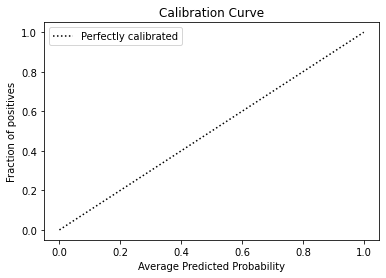

In [80]:
# Create the calibration curve plot with the guideline
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

In [ ]:
# Add the calibration curve for the logistic regression to the plot
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

In [ ]:
# Add the calibration curve for the gradient boosted tree
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_pred_val_lr, frac_of_pos_lr,
         's-', label='%s' % 'Logistic Regression')
plt.plot(mean_pred_val_gbt, frac_of_pos_gbt,
         's-', label='%s' % 'Gradient Boosted Tree')
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

Expand the plot window and take a good look at this. Notice that for the logistic regression, the calibration for probabilities starts off great but then gets more erratic as it the average probability approaches 0.4. Something similar happens to the gradient boosted tree around 0.5, but the model eventually stabilizes. We will be focusing on only the gbt model from now on.
# Credit acceptance rates
1. Credit acceptance rates

We've compared our two models and decided to proceed with the gradient boosted tree. It's time to begin implementing our model and the predicted probabilities of default.

2. Thresholds and loan status

Until now, we've used guesses and simple checks to set threshold values for determining the loan status based on the predicted probability of default. With those values, we used code like this to set a new loan status based on the probability and threshold. These new values of loan status impact the performance metrics of our model as well as the estimated financial impact on the portfolio. If we have three loans with these probabilities of default, those above the threshold are considered defaults and those below are considered non-defaults.

3. Thresholds and acceptance rate

Our models have already predicted the probabilities of default, and we can use these probabilities to calculate the threshold. Because the threshold is used to determine what is a default or non-default, it can also be used to approve or deny new loans as they come in. For example purposes, let's assume our test set is a fresh batch of new loans. Before we calculate the threshold, we need to understand a concept known as acceptance rate. This is a percentage of new loans that we accept with the goal of keeping the number of defaults in a portfolio below a certain number.

4. Understanding acceptance rate

Here's an example using our test data. If we want to accept 85% of all loans with the lowest probabilities of default, then our acceptance rate is 85%. This means we reject 15% of all loans with the highest probabilities of default. Instead of setting a threshold value, we want to calculate it to separate the loans we accept using our acceptance rate from the loans we reject. This value will not be the same 85% that we used as an acceptance rate.

5. Calculating the threshold

In order to calculate this threshold we need to use the quantile function from numpy. This uses our array of probabilities of default and the acceptance rate to determine what value separates our accepted loans from rejected loans. In our example, the threshold is 0.804. This means that all of our new loans with a probability of default below 80% are accepted, and all probabilities above that are rejected.

6. Implementing the calculated threshold

Reassigning loan status values is done the same way as before. We apply a one-time function to our data frame using our new threshold value.

7. Bad Rate

Even though we've calculated an acceptance rate for our loans and set a threshold, there will still be some defaults in our accepted loans. These are often in probability ranges where our model was not well-calibrated. For our example, we accepted 85% of the loans, but not all of them are non-defaults as we might wish. The bad rate is the percentage of accepted loans which are actually defaults. So, our bad rate is a percentage of the 10,016 accepted loans.


8. Bad rate calculation

The calculation for the bad rate is the number of defaults in our accepted loans divided by the total number of accepted loans. In Python, we use the sum function from numpy to count the number of defaults, and the count method to get the total number of accepted loans. The reason this method works is because our non-defaults are zero and defaults are one, the sum is mathematically the same as the count of defaults. This divided by the count of rows in the data frame gives us our bad rate!

9. Let's practice!

So, we've talked about acceptance rates, bad rates, and how to apply them to the data. Time for some Python exercises!

# Acceptance rates
Setting an acceptance rate and calculating the threshold for that rate can be used to set the percentage of new loans you want to accept. For this exercise, assume the test data is a fresh batch of new loans. You will need to use the quantile() function from numpy to calculate the threshold.

The threshold should be used to assign new loan_status values. Does the number of defaults and non-defaults in the data change?

The trained model clf_gbt and the data frame of it's predictions, test_pred_df, are available.

In [81]:
# Check the statistics of the probabilities of default
print(test_pred_df['prob_default'].describe())

# Calculate the threshold for a 85% acceptance rate
threshold_85 = np.quantile(test_pred_df['prob_default'], 0.85)

# Apply acceptance rate threshold
test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

# Print the counts of loan status after the threshold
print(test_pred_df['pred_loan_status'].value_counts())

NameError: name 'test_pred_df' is not defined

In [ ]:
# Visualizing quantiles of acceptance
You know how quantile() works to compute a threshold, and you've seen an example of what it does to split the loans into accepted and rejected. What does this threshold look like for the test set, and how can you visualize it?

To check this, you can create a histogram of the probabilities and add a reference line for the threshold. With this, you can visually show where the threshold exists in the distribution.

The model predictions clf_gbt_preds have been loaded into the workspace.

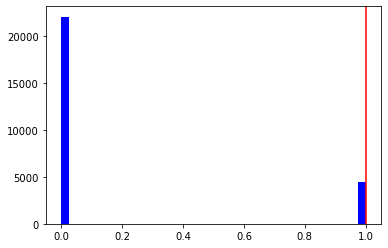

In [84]:
# Plot the predicted probabilities of default
plt.hist(clf_gbt_preds, color = 'blue', bins = 40)

# Calculate the threshold with quantile
threshold = np.quantile(clf_gbt_preds, 0.85)

# Add a reference line to the plot for the threshold
plt.axvline(x = threshold, color = 'red')
plt.show()

Here, you can see where the threshold is on the range of predicted probabilities. Not only can you see how many loans will be accepted (left side), but also how many loans will be rejected (right side). I recommend that you re-run this code with different threshold values to better understand how this affects the acceptance rate
# Bad rates
With acceptance rate in mind, you can now analyze the bad rate within the accepted loans. This way you will be able to see the percentage of defaults that have been accepted.

Think about the impact of the acceptance rate and bad rate. We set an acceptance rate to have fewer defaults in the portfolio because defaults are more costly. Will the bad rate be less than the percentage of defaults in the test data?

The predictions data frame test_pred_df has been loaded into the workspace.

This bad rate doesn't look half bad! The bad rate with the threshold set by the 85% quantile() is about 8%. This means that of all the loans we've decided to accept from the test set, only 8% were actual defaults! If we accepted all loans, the percentage of defaults would be around 22%.
# Acceptance rate impact
Now, look at the loan_amnt of each loan to understand the impact on the portfolio for the acceptance rates. You can use cross tables with calculated values, like the average loan amount, of the new set of loans X_test. For this, you will multiply the number of each with an average loan_amnt value.

When printing these values, try formatting them as currency so that the numbers look more realistic. After all, credit risk is all about money. This is accomplished with the following code:

pd.options.display.float_format = '${:,.2f}'.format
The predictions data frame test_pred_df, which now includes the loan_amnt column from X_test, has been loaded in the workspace

In [ ]:
# Print the statistics of the loan amount column
print(test_pred_df['loan_amnt'].describe())

# Store the average loan amount
avg_loan = np.mean(test_pred_df['loan_amnt'])

# Set the formatting for currency, and print the cross tab
pd.options.display.float_format = '${:,.2f}'.format
print(pd.crosstab(test_pred_df['true_loan_status'],
                 test_pred_df['pred_loan_status_15']).apply(lambda x: x * avg_loan, axis = 0))

<script.py> output:

    count    11784.000000
    mean      9556.283944
    std       6238.005674
    min        500.000000
    25%       5000.000000
    50%       8000.000000
    75%      12000.000000
    max      35000.000000
    Name: loan_amnt, dtype: float64
    pred_loan_status_15              0              1
    true_loan_status                                 
    0                   $87,812,693.16     $86,006.56
    1                    $7,903,046.82 $16,809,503.46
    
With this, we can see that our bad rate of about 8% represents an estimated loan value of about 7.9 million dollars. This may seem like a lot at first, but compare it to the total value of non-default loans! With this, we are ready to start talking about our acceptance strategy going forward.
# Credit strategy and minimum expected loss
1. Credit strategy and minimum expected loss
We've looked at acceptance rates to calculate thresholds and we calculated bad rates to see how many defaults are accepted. Now, let's talk about how we test many different acceptance rates and how we can estimate total expected loss.

2. Selecting acceptance rates
Previously, we selected an acceptance rate of 85%. What if we don't know what values to set? To discover the bad rate an impact of each acceptance rate we could calculate all the values manually, or we could calculate them automatically and create a table. This table is referred to as the strategy table because we can choose our acceptance rate based on our overall strategy for the loan portfolio.

3. Setting up the strategy table
Before we begin calculating all the values for the strategy table, we first set up objects to store the values. Here, we create a list of all the acceptance rates to test. We also have two empty lists to store the thresholds and bad rates.

4. Calculating the table values
To create the table, we use a for loop to perform all of the calculations automatically and store the results. So, for each acceptance rate we define, we calculate the threshold, store it for later, apply it to the loans, create a subset called accepted loans, and then calculate and store the bad rate.

5. Strategy table interpretation
Once the for loop completes we can create a data frame for the strategy table which contains the values from each of the lists we made before. If we decided on an acceptance rate of 90%, then here we can see the threshold and bad rate for that acceptance rate. We accept only 90% of new loans, and reject the top 10% which gives us a threshold of 0.947. If we assume our test set loans are new loans not seen before, then we have an estimated bad rate of 13%.

6. Adding accepted loans
To make the strategy table more useful, we are going to add a few columns. The first is the number of accepted loans. This shows us how many new loans we accept for each acceptance rate.

7. Adding average loan amount
Next, we add an average loan value that we will use later. This is just the average loan amount from the test set.

8. Estimating portfolio value
Finally, the estimated value is difference between the average value of the accepted non-defaults minus the average value of accepted defaults. Remember, the accepted defaults is represented as a percentage which is the bad rate. Here, I assume each default in our accepted loans is a loss of the average amount of all loans. This gives a rough estimate for the portfolio value at each acceptance rate. So, if I choose an acceptance rate of 95% then my bad rate is 17.7%. If my acceptance rate is 85% then my bad rate is 9%. There is a trade-off between acceptance and bad rate. With this new table, we can estimate the difference.

9. Total expected loss
The final way we will measure the financial impact of our predictions is with total expected loss. This represents how much we expect to lose on loan defaults given their probability of default. We will take the product of the probability of default, loss given default, and exposure at default for each loan, and sum it. Within our predictions data frame we will use the probability of default from prob_default, the exposure will be assumed as the total loan value, and the loss given default will be 1 for a total loss on the loan.

10. Let's practice!
Now that we've figured out how to create the strategy table and calculate total expected loss for the portfolio, let's finish strong with our final set of coding exercises!
# Making the strategy table
Before you implement a strategy, you should first create a strategy table containing all the possible acceptance rates you wish to look at along with their associated bad rates and threshold values. This way, you can begin to see each part of your strategy and how it affects your portfolio.

Automatically calculating all of these values only requires a for loop, but requires many lines of python code. Don't worry, most of the code is already there. Remember the calculations for threshold and bad rate.

The array accept_rates has already been populated and loaded into the workspace along with the data frames preds_df_gbt and test_pred_df. The arrays thresholds and bad_rates have not been populated.

In [ ]:
# Print accept rates
print(accept_rates)
# Populate the arrays for the strategy table with a for loop
for rate in accept_rates:
  	# Calculate the threshold for the acceptance rate
    thresh = np.quantile(preds_df_gbt['prob_default'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(np.quantile(preds_df_gbt['prob_default'], rate).round(3))
    # Reassign the loan_status value using the threshold
    test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['true_loan_status']) / len(accepted_loans['true_loan_status'])).round(3))

In [ ]:
# Create a data frame of the strategy table
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates),
                        columns = ['Acceptance Rate','Threshold','Bad Rate'])

# Print the entire table
print(strat_df)

<script.py> output:

        Acceptance Rate  Threshold  Bad Rate
    0              1.00      1.000     0.219
    1              0.95      0.992     0.179
    2              0.90      0.976     0.132
    3              0.85      0.804     0.083
    4              0.80      0.254     0.061
    5              0.75      0.178     0.052
    6              0.70      0.138     0.043
    7              0.65      0.111     0.036
    8              0.60      0.093     0.030
    9              0.55      0.078     0.027
    10             0.50      0.066     0.023
    11             0.45      0.055     0.020
    12             0.40      0.045     0.017
    13             0.35      0.037     0.014
    14             0.30      0.030     0.010
    15             0.25      0.022     0.008
    16             0.20      0.015     0.005
    17             0.15      0.008     0.001
    18             0.10      0.004     0.000
    19             0.05      0.002     0.000
That for loop was a lot of code, but look at this sweet strategy table we have now. This uses our specific predictions on the credit data, and can be used to see the acceptance rates, bad rates, and financial impact all at once. One of these values has the highest estimated value.
# Visualizing the strategy
Now you have the extended strategy table strat_df. The table is not so big that it's difficult to analyze, but visuals can help you see the overview all at once.

You should check at the distribution of each column with a box plot. If the distribution of Acceptance Rate looks the same as the Bad Rate column, that could be a problem. That means that the model's calibration is likely much worse than you thought.

You can also visualize the strategy curve with a line plot. The Acceptance Rate would be the independent variable with the Bad Rate as the dependent variable.

The strategy table strat_df has been loaded in the workspace.
# Visualize the distributions in the strategy table with a boxplot



In [85]:
strat_df.boxplot()
plt.show()

NameError: name 'strat_df' is not defined

In [ ]:
# Plot the strategy curve
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

The boxplot shows us the distribution for each column. Look at the strategy curve. The bad rates are very low up until the acceptance rate 0.6 where they suddenly increase. This suggests that many of the accepted defaults may have a prob_default value between 0.6 and 0.8.
# Estimated value profiling
The strategy table, strat_df, can be used to maximize the estimated portfolio value and minimize expected loss. Extending this table and creating some plots can be very helpful to this end.

The strat_df data frame is loaded and has been enhanced already with the following columns:

# Column	Description
Num Accepted Loans	The number of accepted loans based on the threshold
Avg Loan Amnt	The average loan amount of the entire test set
Estimated value	The estimated net value of non-defaults minus defaults

In [ ]:
# Print the contents of the strategy df
print(strat_df)

In [ ]:
# Create a line plot of estimated value
plt.plot(strat_df['Acceptance Rate'],strat_df['Estimated Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.axes().yaxis.grid()
plt.show()

In [ ]:
# Print the row with the max estimated value
print(strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])])

With our credit data and our estimated averag loan value, we clearly see that the acceptance rate 0.85 has the highest potential estimated value. Normally, the allowable bad rate is set, but we can use analyses like this to explore other options.
# Total expected loss
It's time to estimate the total expected loss given all your decisions. The data frame test_pred_df has the probability of default for each loan and that loan's value. Use these two values to calculate the expected loss for each loan. Then, you can sum those values and get the total expected loss.



For this exercise, you will assume that the exposure is the full value of the loan, and the loss given default is 100%. This means that a default on each the loan is a loss of the entire amount.

The data frame test_pred_df has been loaded into the workspace.

In [ ]:
# Print the first five rows of the data frame
print(test_pred_df.head())

# Calculate the bank's expected loss and assign it to a new column
test_pred_df['expected_loss'] = test_pred_df['prob_default'] * test_pred_df['loan_amnt'] * test_pred_df['loss_given_default']

# Calculate the total expected loss to two decimal places
tot_exp_loss = round(np.sum(test_pred_df['expected_loss']),2)

# Print the total expected loss
print('Total expected loss: ', '${:,.2f}'.format(tot_exp_loss))

This is the total expected loss for the entire portfolio using the gradient boosted tree. $27 million may seem like a lot, but the total expected loss would have been over $28 million with the logistic regression. Some losses are unavoidable, but your work here might have saved the company a million dollars!